# Step 1 - Import data set you exported in Exercise 4.9 

Import Library

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Import Data

In [3]:
path = r'C:\Users\Timbr\OneDrive\Desktop\Career Foundry\Data Immersion\Achievement 4\Instacart Basket Analysis - Achievement 4 -  Tim Brandt'

In [4]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_V4.pkl'))

In [5]:
df_ords_prods_merge.head()

,user_id,First Name,Last Name,Gender,State,Age,date_joined,dependants,Marital Status,income,...,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Regularly busy,Regularly days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Regularly busy,Regularly days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Regularly busy,Slowest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer


# Step 2 - Address PII data

In [6]:
#droping name columns
columns_to_drop = ['First Name', 'Last Name']

In [7]:
df_ords_prods_merge = df_ords_prods_merge.drop(columns=columns_to_drop)

In [8]:
df_ords_prods_merge.head()

,user_id,Gender,State,Age,date_joined,dependants,Marital Status,income,order_id,eval_set,...,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,9.0,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,9.0,Regularly busy,Regularly days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,9.0,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,12.6,Regularly busy,Regularly days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,12.6,Regularly busy,Slowest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer


# Step 3 - Create regional segmentation of the data

In [9]:
# Defining regions

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# Assign States in 'state' column to a region

df_ords_prods_merge.loc[df_ords_prods_merge['State'].isin(Northeast), 'region'] = 'Northeast'
df_ords_prods_merge.loc[df_ords_prods_merge['State'].isin(Midwest), 'region'] = 'Midwest'
df_ords_prods_merge.loc[df_ords_prods_merge['State'].isin(South), 'region'] = 'South'
df_ords_prods_merge.loc[df_ords_prods_merge['State'].isin(West), 'region'] = 'West'

In [11]:
# Check Totals

df_ords_prods_merge['region'].value_counts(dropna = False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [12]:
# Check Headers

df_ords_prods_merge.head()

,user_id,Gender,State,Age,date_joined,dependants,Marital Status,income,order_id,eval_set,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regularly days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Regularly busy,Regularly days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Regularly busy,Slowest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


Check for variations in spending habits by region

In [13]:
crosstab = pd.crosstab(df_ords_prods_merge['region'], df_ords_prods_merge['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


# Step 4 - Create an exclusion flag for low-activity customers & exclude them

In [15]:
# Create flag for customers with less than 5 orders

df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] < 5, 'customer_activity'] = 'low activity'

In [16]:
# Create flag for customers with 5 orders or more

df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] >= 5, 'customer_activity'] = 'high activity'

In [17]:
df_ords_prods_merge['customer_activity'].value_counts(dropna = False)

customer_activity
high activity    30992664
low activity      1441548
Name: count, dtype: int64

In [18]:
# Assign low activity profiles to new dataframe

low_activity_customers = df_ords_prods_merge[df_ords_prods_merge['customer_activity'] == 'low activity']

In [19]:
# Export and save low activity profiles

low_activity_customers.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [20]:
# Assign high activity profiles to new dataframe

high_activity_customers = df_ords_prods_merge[df_ords_prods_merge['customer_activity'] == 'high activity']

In [21]:
# Export and save high activity profiles

high_activity_customers.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [22]:
df_ords_prods_merge.head()

,user_id,Gender,State,Age,date_joined,dependants,Marital Status,income,order_id,eval_set,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Regularly days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Slowest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity


In [23]:
# Contuning the analysis with new 'high_active_customers' Dataframe.
high_activity_customers = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_customers.pkl'))

# Step 5 - Create a profiling variable based on age, income, certain goods

Age Groups

In [24]:
high_activity_customers.loc[high_activity_customers['Age'] <= 29, 'age_group'] = '18-29'
high_activity_customers.loc[(high_activity_customers['Age'] > 29) & (high_activity_customers['Age'] < 40), 'age_group'] = '30-39'
high_activity_customers.loc[(high_activity_customers['Age'] > 39) & (high_activity_customers['Age'] < 50), 'age_group'] = '40-49'
high_activity_customers.loc[(high_activity_customers['Age'] > 49) & (high_activity_customers['Age'] < 60), 'age_group'] = '50-59'
high_activity_customers.loc[(high_activity_customers['Age'] > 59) & (high_activity_customers['Age'] < 70), 'age_group'] = '60-69'
high_activity_customers.loc[high_activity_customers['Age'] > 69, 'age_group'] = '70 and over'

In [25]:
# Check totals

high_activity_customers['age_group'].value_counts(dropna = False)

age_group
18-29          5823021
70 and over    5817756
40-49          4887575
30-39          4851629
50-59          4846498
60-69          4766185
Name: count, dtype: int64

In [27]:
# Check headers
high_activity_customers.head()

,user_id,Gender,State,Age,date_joined,dependants,Marital Status,income,order_id,eval_set,...,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49


Income Groups

In [28]:
high_activity_customers.loc[high_activity_customers['income'] <= 75000, 'income_group'] = 'Lower'
high_activity_customers.loc[(high_activity_customers['income'] > 75000) & (high_activity_customers['income'] <= 120000), 'income_group'] = 'Middle'
high_activity_customers.loc[high_activity_customers['income'] > 120000, 'income_group'] = 'Upper'

In [30]:
# Check totals

high_activity_customers['income_group'].value_counts(dropna = False)

income_group
Middle    11888963
Lower      9916338
Upper      9187363
Name: count, dtype: int64

In [31]:
# Check headers
high_activity_customers.head()

,user_id,Gender,State,Age,date_joined,dependants,Marital Status,income,order_id,eval_set,...,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper


Departments

In [32]:
# Importing department data

df_dep =pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [33]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [34]:
# Rename column.
df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [35]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [36]:
high_activity_customers.head()

,user_id,Gender,State,Age,date_joined,dependants,Marital Status,income,order_id,eval_set,...,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper


In [37]:
# Merging the departments dataframe with high_active_customers dataframe.
df_merged = high_activity_customers.merge(df_dep, on = 'department_id')

In [38]:
# checking the merge result.
df_merged[['user_id', 'department_id', 'department']].head(10)

,user_id,department_id,department
0,26711,7,beverages
1,26711,7,beverages
2,26711,7,beverages
3,33890,7,beverages
4,33890,7,beverages
5,33890,7,beverages
6,33890,7,beverages
7,65803,7,beverages
8,65803,7,beverages
9,65803,7,beverages


Dependents

In [40]:
# Creating flag for number of dependents in a household.

df_merged.loc[(df_merged['Marital Status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['dependants'] ==0), 'customer_profile'] = 'Single adult'

df_merged.loc[(df_merged['Marital Status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['dependants'] >0), 'customer_profile'] = 'Young parent'

df_merged.loc[(df_merged['Marital Status']=='married') & (df_merged['dependants'] <=2), 'customer_profile'] = 'Family'

df_merged.loc[(df_merged['Marital Status']=='married') & (df_merged['dependants'] >2), 'customer_profile'] = 'Big Family'

In [42]:
# Checking the results.
df_merged[['Marital Status', 'dependants', 'customer_profile']].head(30)

,Marital Status,dependants,customer_profile
0,married,3,Big Family
1,married,3,Big Family
2,married,3,Big Family
3,single,0,Single adult
4,single,0,Single adult
5,single,0,Single adult
6,single,0,Single adult
7,married,2,Family
8,married,2,Family
9,married,2,Family


In [43]:
df_merged['customer_profile'].value_counts(dropna = False)

customer_profile
Family          14472584
Single adult     7747032
Big Family       7290437
Young parent     1482611
Name: count, dtype: int64

# Step 6 - appropriate visualization to show the distribution of profiles

Text(0.5, 1.0, 'Distribution of Age Groups')

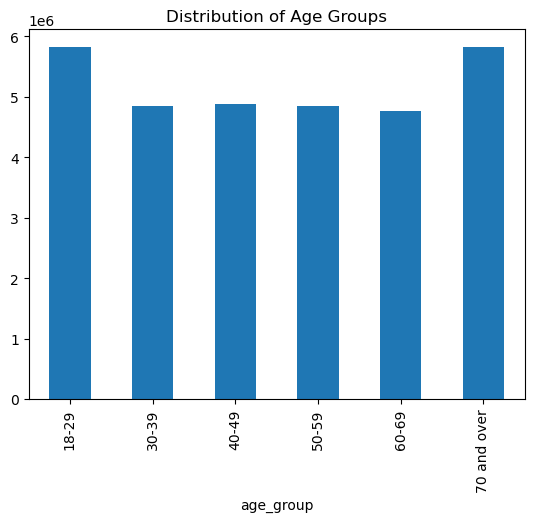

In [49]:
# Creating bar chart for 'age_category' 
bar_age_group = df_merged['age_group'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Groups')

In [50]:
# Exporting bar chart.
bar_age_group.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_age_group.png'))

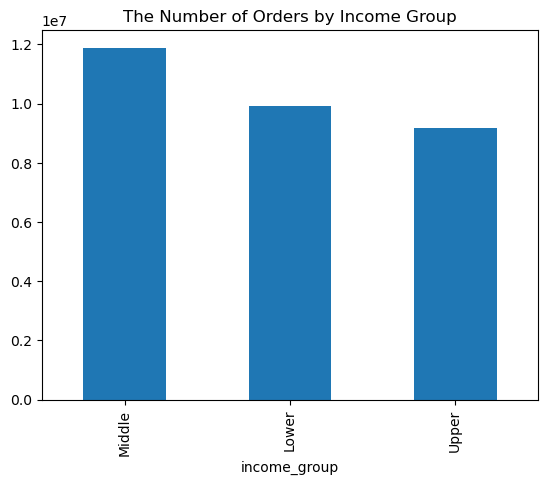

In [53]:
# Bar chart of income_group
bar_income_group = df_merged['income_group'].value_counts().plot.bar(title ='The Number of Orders by Income Group')

In [55]:
# Exporting bar chart
bar_income_group.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_income_group.png'))

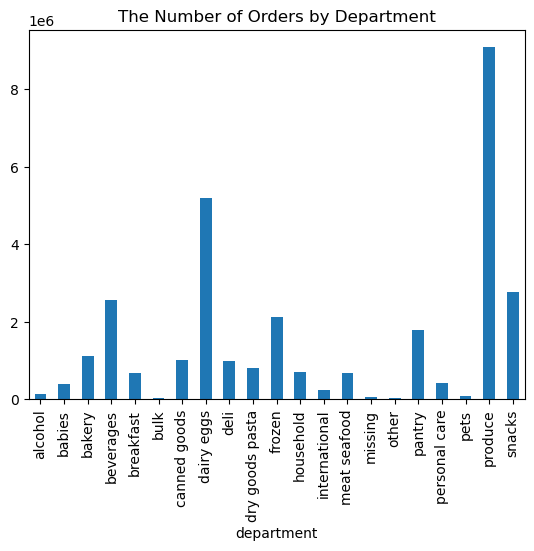

In [56]:
# Creating a bar chart for departments.
bar_department = df_merged['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

In [57]:
# Exporting bar chart
bar_department.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_departments.png'))

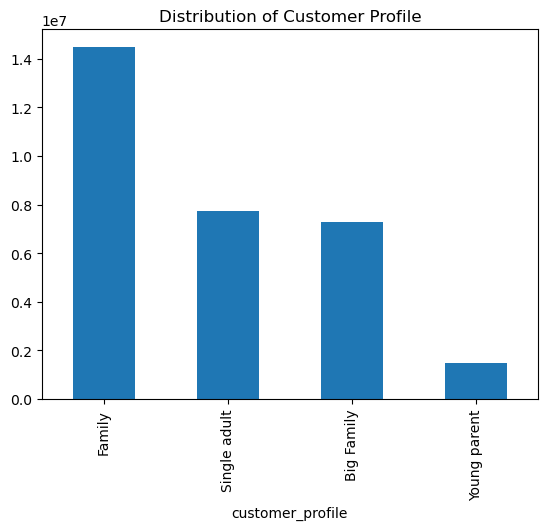

In [58]:
# Creating a bar chart for 'customer_profile'
bar_family_status = df_merged['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile')

In [60]:
# Exporting bar chart
bar_family_status.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_family_status.png'))

# Step 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

Age Group of Customer

In [64]:
age_group_agg = df_merged.groupby('age_group',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [66]:
age_group_agg

days_since_prior_order                  prices                    
                               min   max       mean    min      max       mean
age_group                                                                     
18-29                          0.0  30.0  10.815080    1.0  99999.0  12.199361
30-39                          0.0  30.0  10.806591    1.0  99999.0  11.885063
40-49                          0.0  30.0  10.797034    1.0  99999.0  12.271870
50-59                          0.0  30.0  10.842601    1.0  99999.0  11.781495
60-69                          0.0  30.0  10.791780    1.0  99999.0  11.536726
70 and over                    0.0  30.0  10.808538    1.0  99999.0  11.880453

Income group of Customer

In [67]:
# Aggregate min. max. and mean on customer's 'income_class' for usage and expenditure.
income_group_agg = df_merged.groupby('income_group',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [68]:
income_group_agg

days_since_prior_order                  prices           \
                                min   max       mean    min      max   
income_group                                                           
Lower                           0.0  30.0  10.901046    1.0  14900.0   
Middle                          0.0  30.0  10.773805    1.0  99999.0   
Upper                           0.0  30.0  10.760062    1.0  99999.0   

                         
                   mean  
income_group             
Lower          7.456285  
Middle         9.404969  
Upper         20.041344

Depandents

In [69]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
customer_profile_agg = df_merged.groupby('customer_profile',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [70]:
customer_profile_agg

days_since_prior_order                  prices           \
                                    min   max       mean    min      max   
customer_profile                                                           
Big Family                          0.0  30.0  10.826198    1.0  99999.0   
Family                              0.0  30.0  10.818535    1.0  99999.0   
Single adult                        0.0  30.0  10.791750    1.0  99999.0   
Young parent                        0.0  30.0  10.750739    1.0  99999.0   

                             
                       mean  
customer_profile             
Big Family        11.806975  
Family            12.015009  
Single adult      12.103485  
Young parent      10.892382

Departments

In [72]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
department_customer_profile_agg = df_merged.groupby(['customer_profile', 'department'])[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [73]:
department_customer_profile_agg

days_since_prior_order                  prices  \
                                                  min   max       mean    min   
customer_profile department                                                     
Big Family       alcohol                          0.0  30.0   9.874774    1.0   
                 babies                           0.0  30.0   9.612820    1.0   
                 bakery                           0.0  30.0  10.800523    1.0   
                 beverages                        0.0  30.0  10.813165    1.0   
                 breakfast                        0.0  30.0  11.043296    1.0   
...                                               ...   ...        ...    ...   
Young parent     pantry                           0.0  30.0  10.576977    1.0   
                 personal care                    0.0  30.0  11.315281    1.0   
                 pets                             0.0  30.0  11.389847    1.0   
                 produce                          0.0  30.0  10.569925    1.0   
                 snacks                           0.0  30.0  10.611435    1.6   

                                                
                                 max      mean  
customer_profile department                     
Big Family       alcohol        15.0  8.260851  
                 babies         15.0  7.658709  
                 bakery         15.0  7.879297  
                 beverages      15.0  7.667451  
                 breakfast      14.9  8.050888  
...                              ...       ...  
Young parent     pantry         20.0  8.017662  
                 personal care  15.0  7.938779  
                 pets           15.0  7.918097  
                 produce        15.0  8.003058  
                 snacks          7.0  4.265732  

[84 rows x 6 columns]

# Step 8 - Compare customer profiles with regions and departments

In [75]:
# Checking the relationship of 'age_category' & 'income_class' of customers profile in differnet regions.
profile_age_region = df_merged.groupby('region')[['income_group','age_group']].value_counts().reset_index(name='count')

In [77]:
profile_age_region

,region,income_group,age_group,count
0,Midwest,Lower,18-29,817400
1,Midwest,Lower,30-39,706823
2,Midwest,Upper,70 and over,617654
3,Midwest,Upper,50-59,543504
4,Midwest,Middle,70 and over,530675
...,...,...,...,...
67,West,Lower,70 and over,237942
68,West,Lower,50-59,205614
69,West,Lower,60-69,186523
70,West,Upper,18-29,16898


In [78]:
# Checking income_class by regions.
region_income = pd.crosstab(df_merged['income_group'],df_merged['region'], dropna = False)

In [79]:
region_income

region,Midwest,Northeast,South,West
income_group,,,,
Lower,2302653,1731681,3317045,2564959
Middle,2774387,2107868,3977522,3029186
Upper,2190667,1630519,3025895,2340282


# Step 9 - Produce suitable charts

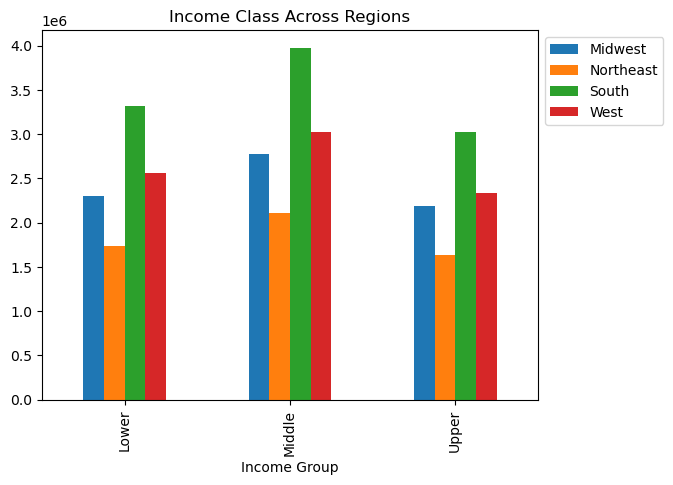

In [80]:
# Visualtization of 'income_class' and 'region'
bar_region_income = region_income.plot.bar(title = 'Income Class Across Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [81]:
# Export bar chart
bar_region_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_income.png'))

In [82]:
# Piovt the data to create a stacked bar chart to see relationship between 'departments' and 'customers_profile'
customer_family_department = df_merged.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

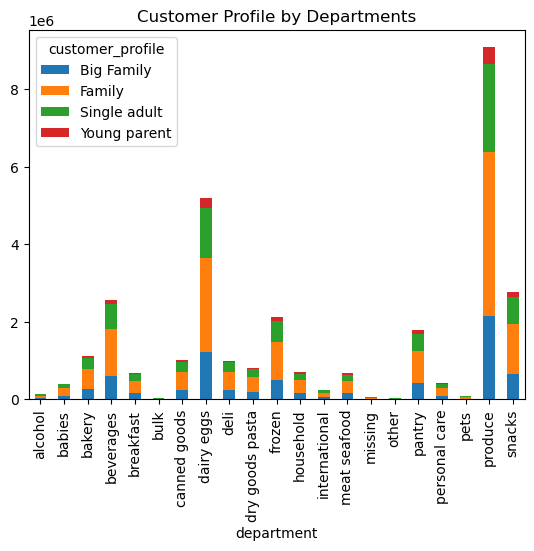

In [85]:
#stacked bar graph
stacked_family_department = customer_family_department.plot.bar(stacked = True, title = 'Customer Profile by Departments')

In [86]:
# Export stacked bar chart
stacked_family_department.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'stacked_family_department.png'))

In [88]:
# Create a crosstab to count the occurrences of age categories in each department
cross_tab_age_group = pd.crosstab(df_merged['department'], df_merged['age_group'])

<Figure size 1200x600 with 0 Axes>

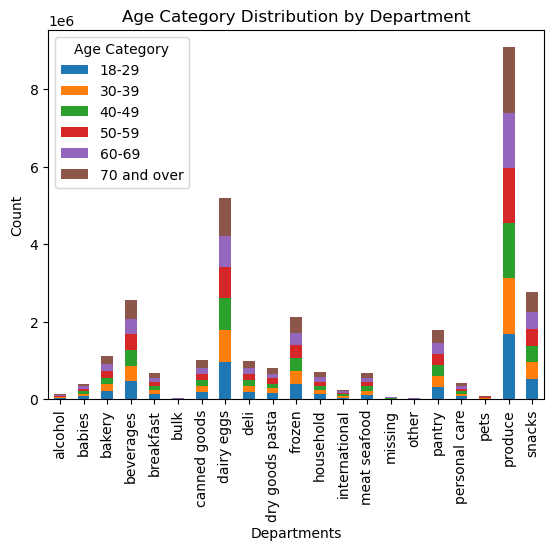

In [89]:
# Creating a clustered bar chart
plt.figure(figsize=(12, 6))
clustered_cross_tab_age_group = cross_tab_age_group.plot(kind='bar', stacked=True, title='Age Category Distribution by Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title='Age Category')

In [90]:
# Exporting clustered bar chart
clustered_cross_tab_age_group.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clustered_cross_tab_age_group.png',))

In [91]:
# Checking customer_profile by region
customer_by_region = pd.crosstab(df_merged['customer_profile'],df_merged['region'], dropna = False)

In [92]:
customer_by_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Big Family,1673042,1293051,2427766,1896578
Family,3418486,2564406,4802439,3687253
Single adult,1824487,1355828,2584352,1982365
Young parent,351692,256783,505905,368231


Text(0.5, 1.0, 'Customer Profile Distribution by Region')

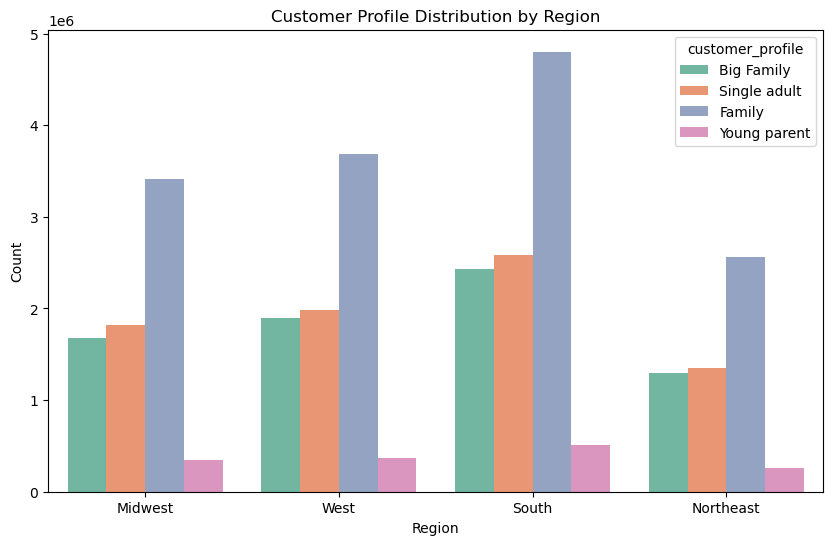

In [93]:
# Create a countplot to visualize the distribution of 'customer_profile' in each 'region'
plt.figure(figsize=(10, 6))
countplot_customer_by_region = sns.countplot(x='region', hue='customer_profile', data=df_merged, palette='Set2')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Profile Distribution by Region')

In [94]:
# exporting Countplot bar chart
countplot_customer_by_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'countplot_customer_by_region.png'))

# Step 10 - export your final data set

In [ ]:
# Exporting Dataframe.
df_merged.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_dept_merged.pkl'))